## SimRankLowrank Pathways

In [37]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import scipy.sparse as spsp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from pandas import read_csv
import pandas as pd

In [2]:
graph_filename_mat = "./data/delaunay_n12.mat"
c = 0.6
num_iter = 5
W = sio.loadmat(graph_filename_mat)['Problem'][0][0][2]
C = normalize(W, norm='l1', axis=0)
C = np.sqrt(c) * C
print("Number of vertices =", C.shape[0])
print("Number of edges =", C.nnz / 2)

Number of vertices = 4096
Number of edges = 12264.0


## Compute correct SimRank with naive aproach

In [3]:
def simrank_naive(W, k):
    S = np.eye(max(W.shape))
    for i in range(int(k)):
        S = W.T.dot(S)
        S = W.T.dot(S.T)
        for j in range(max(W.shape)):
            S[j,j] = 1
    return S

In [4]:
S_true = simrank_naive(C, num_iter)

In [5]:
S_true

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.86806916e-05, 2.49471844e-05, 6.05660981e-05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.60915485e-05, 1.16690326e-05, 6.32475181e-06],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.86806916e-05, 2.60915485e-05, 0.00000000e+00, ...,
        1.00000000e+00, 9.48666394e-02, 7.22038713e-02],
       [2.49471844e-05, 1.16690326e-05, 0.00000000e+00, ...,
        9.48666394e-02, 1.00000000e+00, 9.22689284e-02],
       [6.05660981e-05, 6.32475181e-06, 0.00000000e+00, ...,
        7.22038713e-02, 9.22689284e-02, 1.00000000e+00]])

## Compute SimRank lowrank approximation

The approach in SimRank approximation is presented in the following equation:
$$
\tilde{S} = I + C^{\top}C - \text{diag}(C^{\top}C) + UDU^{\top}.
$$
The matrix $C$ is the normalized by columns and scaled by $\sqrt{c}$ adjacency matrix of the graph. The matrix $U$ is lowrank and the matrix $D$ is diagonal.

In [6]:
num_iter = 50
rank = 100
oversampl = 0
U_file = "./data/U_del12.csv"
d_file = "./data/d_del12.csv"
graph_filename_mtx = graph_filename_mat.split("/")[2].split(".")[0] + ".mtx" 
graph_filename_mtx = "/".join(graph_filename_mat.split("/")[0:2]) + "/" + graph_filename_mtx

In [6]:
!./ccode/build/simrank_lowrank -g $graph_filename_mtx -i $num_iter -c $c -r $rank -s $oversampl -u $U_file -d $d_file

Reading graph from ./data/delaunay_n12.mtx...
Number of vertices = 4096
Number of edges = 12264
Reading graph from ./data/delaunay_n12.mtx...Done
Compute low rank approximation of SimRank...
Iteration 1
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 2
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 3
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 4
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 5
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 6
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 7
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 8
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 9
SVD...
QR...
QR...Done
Eigen 

In [7]:
U = read_csv("./data/U_del12.csv", header=None)
d = np.array(read_csv("./data/d_del12.csv", header=None))
D = np.diag(d[:, 0])

In [8]:
CTC = C.T.dot(C)
S_appr = np.eye(C.shape[0]) + CTC - np.diag(CTC.diagonal()) + U.dot(D).dot(U.T)

In [9]:
S_appr

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.000693,-0.000086,-0.000024,0.000134,0.000046,-1.171290e-04,0.000173,0.000064,-1.895882e-05,0.000061,...,0.000049,0.000061,-0.000027,0.000031,0.000050,0.000012,0.000017,0.000073,-0.000010,0.000032
1,-0.000086,1.000962,0.000190,0.000153,0.000040,2.587545e-07,-0.000123,-0.000040,8.518744e-07,0.000002,...,0.000151,0.000150,0.000088,0.000068,0.000125,0.000086,0.000131,0.000010,0.000008,0.000099
2,-0.000024,0.000190,1.001166,-0.000021,0.000091,-7.415122e-05,-0.000026,-0.000017,-1.180441e-04,-0.000049,...,0.000149,0.000137,-0.000002,-0.000059,-0.000049,-0.000037,-0.000049,0.000074,0.000056,0.000052
3,0.000134,0.000153,-0.000021,1.001357,0.000058,1.554908e-04,0.000050,0.000091,-8.774785e-05,0.000104,...,-0.000368,-0.000236,-0.000180,-0.000149,-0.000211,-0.000069,-0.000117,-0.000229,-0.000228,-0.000182
4,0.000046,0.000040,0.000091,0.000058,1.001383,-3.537632e-05,-0.000026,-0.000122,3.434340e-05,0.000065,...,0.000131,0.000100,0.000025,0.000059,0.000090,0.000042,-0.000080,0.000163,0.000145,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.000012,0.000086,-0.000037,-0.000069,0.000042,6.829389e-05,-0.000064,0.000075,3.014143e-05,0.000116,...,0.000549,0.000320,0.000224,0.000429,0.006284,1.000979,0.015261,0.025930,0.010712,0.000786
4092,0.000017,0.000131,-0.000049,-0.000117,-0.000080,-1.588408e-05,-0.000139,0.000021,-1.302359e-05,0.000080,...,0.000637,0.000408,0.000414,0.000700,0.010477,0.015261,1.001360,0.011809,0.009422,0.000957
4093,0.000073,0.000010,0.000074,-0.000229,0.000163,1.412994e-04,0.000109,-0.000028,4.932437e-05,0.000083,...,0.001309,0.001002,0.000667,0.000750,0.017978,0.025930,0.011809,1.001966,0.031434,0.020234
4094,-0.000010,0.000008,0.000056,-0.000228,0.000145,7.064932e-05,0.000030,-0.000135,-1.466477e-05,0.000054,...,0.016316,0.018150,0.009298,0.012703,0.014521,0.010712,0.009422,0.031434,1.001516,0.031397


In [10]:
print("Difference in Frobenius norm =", np.linalg.norm(S_appr - S_true) / np.linalg.norm(S_true))
print("Difference in l2 norm =", np.linalg.norm(S_appr - S_true, 2) / np.linalg.norm(S_true, 2))

Difference in Frobenius norm = 0.013894533038080211
Difference in l2 norm = 0.06977964299328485


In [7]:
import networkx as nx

g = nx.read_edgelist('./data/prova.txt', nodetype=int,
  data=(('weight',float),), create_using=nx.DiGraph())

print(g.edges(data=True))
pos = nx.spiral_layout(g)

[(0, 1, {'weight': 1.0}), (0, 3, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (3, 1, {'weight': 1.0}), (2, 1, {'weight': 1.0}), (2, 3, {'weight': 1.0})]


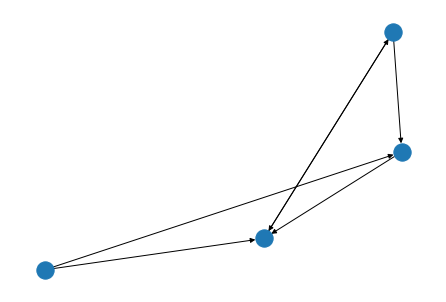

In [9]:
nx.draw(g, pos)
plt.show()

In [10]:
nx.adjacency_matrix(g, nodelist=[0, 1, 2, 3]).todense()

matrix([[0., 1., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 1., 0., 0.]])

In [11]:
W = nx.adjacency_matrix(g, nodelist=[0, 1, 2, 3])
C = normalize(W, norm='l1', axis=0)
C = np.sqrt(c) * C

In [12]:
normalize(W, norm='l1', axis=0).todense()

matrix([[0.        , 0.33333333, 0.        , 0.5       ],
        [0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.33333333, 0.        , 0.5       ],
        [0.        , 0.33333333, 0.        , 0.        ]])

In [13]:
#from scipy.io import savemat

#savemat('prova.mat', {'Grafo': nx.adjacency_matrix(g)})
#sio.loadmat("prova.mat")['Grafo'].todense()

In [14]:
from scipy.io import mmwrite

mmwrite("./data/prova.mtx", nx.adjacency_matrix(g, nodelist=[0, 1, 2, 3]))

In [15]:
c = 0.6
num_iter = 5
rank = 1
oversampl = 0.0001
U_file = "./data/U_prova.csv"
d_file = "./data/d_prova.csv"
graph_filename_mtx = "./data/prova.mtx" 

In [68]:
!./ccode/build/simrank_lowrank -g $graph_filename_mtx -i $num_iter -c $c -r $rank -s $oversampl -u $U_file -d $d_file

Reading graph from ./data/prova.mtx...
Number of vertices = 4
Number of edges = 5
Reading graph from ./data/prova.mtx...Done
Compute low rank approximation of SimRank...
Iteration 1
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 2
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 3
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 4
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 5
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Compute low rank approximation of SimRank... Done
Saving lowrank matrices...
Saving lowrank matrices...Done
Elapsed time = 0.131362


In [69]:
U = read_csv("./data/U_prova.csv", header=None)
d = np.array(read_csv("./data/d_prova.csv", header=None))
D = np.diag(d[:, 0])

In [70]:
CTC = C.T.dot(C)
S_appr = np.eye(C.shape[0]) + CTC - np.diag(CTC.diagonal()) + U.dot(D).dot(U.T)
S_appr

,0,1,2,3
0,1.012297,0.014371,0.023886,0.034205
1,0.014371,1.016795,0.027914,0.189974
2,0.023886,0.027914,1.046396,0.066439
3,0.034205,0.189974,0.066439,1.095142


In [16]:
import pandas as pd

sim = nx.simrank_similarity(g, importance_factor=0.6, max_iterations=5, tolerance=0.0001)
simr = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
S_true = pd.DataFrame(simr, columns = [0,1,2,3])
S_true

,0,1,2,3
0,1.0,0.00000,0.00000,0.00000
1,0.0,1.00000,0.05016,0.20144
2,0.0,0.05016,1.00000,0.01488
3,0.0,0.20144,0.01488,1.00000


In [17]:
simrank_naive(C, 5)

array([[1.     , 0.     , 0.     , 0.     ],
       [0.     , 1.     , 0.05016, 0.20144],
       [0.     , 0.05016, 1.     , 0.01488],
       [0.     , 0.20144, 0.01488, 1.     ]])

In [22]:
print("Difference in Frobenius norm =", np.linalg.norm(S_appr - S_true) / np.linalg.norm(S_true))
print("Difference in l2 norm =", np.linalg.norm(S_appr - S_true, 2) / np.linalg.norm(S_true, 2))

Difference in Frobenius norm = 0.3402459896900193
Difference in l2 norm = 0.31588190887222467


In [18]:
g = nx.read_edgelist('./data/gene_edges.tsv', nodetype=int,
data = (('weight',float),), create_using=nx.DiGraph())

print(g.edges(data=True))

[(3640, 51289, {'weight': 1.0}), (3640, 122042, {'weight': 1.0}), (3640, 339403, {'weight': 1.0}), (3640, 59350, {'weight': 1.0}), (51289, 1956, {'weight': 1.0}), (284217, 3680, {'weight': 1.0}), (284217, 3696, {'weight': 1.0}), (284217, 3674, {'weight': 1.0}), (284217, 3675, {'weight': 1.0}), (284217, 3676, {'weight': 1.0}), (284217, 3655, {'weight': 1.0}), (284217, 3678, {'weight': 1.0}), (284217, 3679, {'weight': 1.0}), (284217, 22987, {'weight': 1.0}), (284217, 22801, {'weight': 1.0}), (284217, 3690, {'weight': 1.0}), (284217, 3691, {'weight': 1.0}), (284217, 3693, {'weight': 1.0}), (284217, 9899, {'weight': 1.0}), (284217, 3694, {'weight': 1.0}), (284217, 3672, {'weight': 1.0}), (284217, 3695, {'weight': 1.0}), (284217, 3673, {'weight': 1.0}), (284217, 960, {'weight': 1.0}), (284217, 3685, {'weight': 1.0}), (284217, 8516, {'weight': 1.0}), (284217, 9900, {'weight': 1.0}), (284217, 3688, {'weight': 1.0}), (284217, 8515, {'weight': 1.0}), (284217, 1605, {'weight': 1.0}), (284217, 57

In [19]:
pathways_edges = []
pathways_names = []
pathways_id = []
name2idx = {}
idx2name = {}
i = 1
nodes_list = []
with open("./data/pathways.tsv") as pathways:
    pathways.readline()
    for pathway in pathways:
        pw = pathway.split("\t")
        pw[2] = pw[2][:-1]
        pw[2] = pw[2].split(";")
        node_list = [(int(node)) for node in pw[2]]
        for node in pw[2]:
            if int(node) not in g:
                g.add_node(int(node))
        while i not in g:
            i += 1
        pathways_id.append(i)
        idx2name[i] = pw[1]
        name2idx[pw[1]] = i
        i += 1
        g.add_node(name2idx[pw[1]])
        pathways_names.append(pw[1])
        for n in node_list:
            pathways_edges.append([pw[1], n])
            g.add_edge(name2idx[pw[1]], n, weight=1.0)
            g.add_edge(n, name2idx[pw[1]], weight=1.0)

In [20]:
pathways_names

['Oxidative phosphorylation',
 'Synthesis and degradation of ketone bodies',
 'Biosynthesis of unsaturated fatty acids',
 'Intestinal immune network for IgA production',
 'Fanconi anemia pathway',
 'Wnt signaling pathway',
 'Fatty acid degradation',
 'Leukocyte transendothelial migration',
 'Signaling pathways regulating pluripotency of stem cells',
 'Glyoxylate and dicarboxylate metabolism',
 'N-Glycan biosynthesis',
 'Vitamin B6 metabolism',
 'Various types of N-glycan biosynthesis',
 'Mucin type O-glycan biosynthesis',
 'Mannose type O-glycan biosynthesis',
 'Amino sugar and nucleotide sugar metabolism',
 'Phenylalanine, tyrosine and tryptophan biosynthesis',
 'Nicotinate and nicotinamide metabolism',
 'Propanoate metabolism',
 'Neomycin, kanamycin and gentamicin biosynthesis',
 'Natural killer cell mediated cytotoxicity',
 'Fructose and mannose metabolism',
 'Tight junction',
 'Valine, leucine and isoleucine biosynthesis',
 'Galactose metabolism',
 'PPAR signaling pathway',
 'Ascor

In [21]:
pathways_edges

[['Oxidative phosphorylation', 64077],
 ['Oxidative phosphorylation', 5464],
 ['Oxidative phosphorylation', 245972],
 ['Oxidative phosphorylation', 245973],
 ['Oxidative phosphorylation', 479],
 ['Oxidative phosphorylation', 513],
 ['Oxidative phosphorylation', 514],
 ['Oxidative phosphorylation', 515],
 ['Oxidative phosphorylation', 516],
 ['Oxidative phosphorylation', 517],
 ['Oxidative phosphorylation', 518],
 ['Oxidative phosphorylation', 155066],
 ['Oxidative phosphorylation', 51606],
 ['Oxidative phosphorylation', 9114],
 ['Oxidative phosphorylation', 9551],
 ['Oxidative phosphorylation', 9550],
 ['Oxidative phosphorylation', 521],
 ['Oxidative phosphorylation', 522],
 ['Oxidative phosphorylation', 523],
 ['Oxidative phosphorylation', 525],
 ['Oxidative phosphorylation', 526],
 ['Oxidative phosphorylation', 527],
 ['Oxidative phosphorylation', 528],
 ['Oxidative phosphorylation', 529],
 ['Oxidative phosphorylation', 8992],
 ['Oxidative phosphorylation', 90423],
 ['Oxidative phosp

In [22]:
pathways_id

[2,
 25,
 27,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 48,
 50,
 51,
 52,
 54,
 59,
 60,
 71,
 90,
 91,
 92,
 93,
 107,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 133,
 134,
 135,
 136,
 140,
 142,
 143,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 174,
 178,
 181,
 182,
 183,
 185,
 186,
 187,
 189,
 190,
 191,
 196,
 203,
 204,
 205,
 207,
 208,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 226,
 229,
 230,
 231,
 239,
 240,
 242,
 246,
 247,
 248,
 249,
 250,
 251,
 262,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 284,
 285,
 290,
 291,
 292,
 293,
 314,
 316,
 317,
 318,
 324,
 329,
 330,
 331,
 332,
 335,
 336,
 338,
 341,
 344,
 345,
 348,
 350,
 353,
 355,
 356,
 358,
 359,
 362,
 364,
 369,
 374,
 375,
 382,
 383,
 384,
 387,
 394,
 396,
 397,
 398,
 405,
 406,
 408,
 409,
 410,
 411,
 412,
 427,
 434,
 435,
 438,
 440,


In [23]:
name2idx

{'Oxidative phosphorylation': 2,
 'Synthesis and degradation of ketone bodies': 25,
 'Biosynthesis of unsaturated fatty acids': 27,
 'Intestinal immune network for IgA production': 30,
 'Fanconi anemia pathway': 31,
 'Wnt signaling pathway': 32,
 'Fatty acid degradation': 33,
 'Leukocyte transendothelial migration': 34,
 'Signaling pathways regulating pluripotency of stem cells': 35,
 'Glyoxylate and dicarboxylate metabolism': 36,
 'N-Glycan biosynthesis': 37,
 'Vitamin B6 metabolism': 38,
 'Various types of N-glycan biosynthesis': 39,
 'Mucin type O-glycan biosynthesis': 48,
 'Mannose type O-glycan biosynthesis': 50,
 'Amino sugar and nucleotide sugar metabolism': 51,
 'Phenylalanine, tyrosine and tryptophan biosynthesis': 52,
 'Nicotinate and nicotinamide metabolism': 54,
 'Propanoate metabolism': 59,
 'Neomycin, kanamycin and gentamicin biosynthesis': 60,
 'Natural killer cell mediated cytotoxicity': 71,
 'Fructose and mannose metabolism': 90,
 'Tight junction': 91,
 'Valine, leucin

In [24]:
idx2name

{2: 'Oxidative phosphorylation',
 25: 'Synthesis and degradation of ketone bodies',
 27: 'Biosynthesis of unsaturated fatty acids',
 30: 'Intestinal immune network for IgA production',
 31: 'Fanconi anemia pathway',
 32: 'Wnt signaling pathway',
 33: 'Fatty acid degradation',
 34: 'Leukocyte transendothelial migration',
 35: 'Signaling pathways regulating pluripotency of stem cells',
 36: 'Glyoxylate and dicarboxylate metabolism',
 37: 'N-Glycan biosynthesis',
 38: 'Vitamin B6 metabolism',
 39: 'Various types of N-glycan biosynthesis',
 48: 'Mucin type O-glycan biosynthesis',
 50: 'Mannose type O-glycan biosynthesis',
 51: 'Amino sugar and nucleotide sugar metabolism',
 52: 'Phenylalanine, tyrosine and tryptophan biosynthesis',
 54: 'Nicotinate and nicotinamide metabolism',
 59: 'Propanoate metabolism',
 60: 'Neomycin, kanamycin and gentamicin biosynthesis',
 71: 'Natural killer cell mediated cytotoxicity',
 90: 'Fructose and mannose metabolism',
 91: 'Tight junction',
 92: 'Valine, le

In [25]:
mapping_nodes = {}
i = 0
for u in g.nodes:
    mapping_nodes[u] = i
    i += 1
mapping_nodes

{3640: 0,
 51289: 1,
 122042: 2,
 339403: 3,
 59350: 4,
 284217: 5,
 3680: 6,
 3696: 7,
 3674: 8,
 3675: 9,
 3676: 10,
 3655: 11,
 3678: 12,
 3679: 13,
 22987: 14,
 22801: 15,
 3690: 16,
 3691: 17,
 3693: 18,
 9899: 19,
 3694: 20,
 3672: 21,
 3695: 22,
 3673: 23,
 960: 24,
 3685: 25,
 8516: 26,
 9900: 27,
 3688: 28,
 8515: 29,
 1605: 30,
 5747: 31,
 121275: 32,
 2788: 33,
 2774: 34,
 2782: 35,
 51764: 36,
 3630: 37,
 4233: 38,
 4893: 39,
 3265: 40,
 8471: 41,
 3480: 42,
 4804: 43,
 3815: 44,
 1436: 45,
 2324: 46,
 2322: 47,
 2321: 48,
 5159: 49,
 22808: 50,
 1956: 51,
 22800: 52,
 7010: 53,
 8660: 54,
 3791: 55,
 5156: 56,
 2066: 57,
 2264: 58,
 2065: 59,
 2263: 60,
 2064: 61,
 2261: 62,
 2260: 63,
 4914: 64,
 4915: 65,
 6237: 66,
 3643: 67,
 1969: 68,
 3645: 69,
 3667: 70,
 3845: 71,
 2309: 72,
 114907: 73,
 10370: 74,
 8698: 75,
 1263: 76,
 2592: 77,
 9140: 78,
 472: 79,
 595: 80,
 10733: 81,
 10018: 82,
 85417: 83,
 356: 84,
 1410: 85,
 3312: 86,
 5896: 87,
 5897: 88,
 5934: 89,
 11

In [26]:
real_nodes = {v: k for k,v in mapping_nodes.items()}

In [27]:
real_nodes

{0: 3640,
 1: 51289,
 2: 122042,
 3: 339403,
 4: 59350,
 5: 284217,
 6: 3680,
 7: 3696,
 8: 3674,
 9: 3675,
 10: 3676,
 11: 3655,
 12: 3678,
 13: 3679,
 14: 22987,
 15: 22801,
 16: 3690,
 17: 3691,
 18: 3693,
 19: 9899,
 20: 3694,
 21: 3672,
 22: 3695,
 23: 3673,
 24: 960,
 25: 3685,
 26: 8516,
 27: 9900,
 28: 3688,
 29: 8515,
 30: 1605,
 31: 5747,
 32: 121275,
 33: 2788,
 34: 2774,
 35: 2782,
 36: 51764,
 37: 3630,
 38: 4233,
 39: 4893,
 40: 3265,
 41: 8471,
 42: 3480,
 43: 4804,
 44: 3815,
 45: 1436,
 46: 2324,
 47: 2322,
 48: 2321,
 49: 5159,
 50: 22808,
 51: 1956,
 52: 22800,
 53: 7010,
 54: 8660,
 55: 3791,
 56: 5156,
 57: 2066,
 58: 2264,
 59: 2065,
 60: 2263,
 61: 2064,
 62: 2261,
 63: 2260,
 64: 4914,
 65: 4915,
 66: 6237,
 67: 3643,
 68: 1969,
 69: 3645,
 70: 3667,
 71: 3845,
 72: 2309,
 73: 114907,
 74: 10370,
 75: 8698,
 76: 1263,
 77: 2592,
 78: 9140,
 79: 472,
 80: 595,
 81: 10733,
 82: 10018,
 83: 85417,
 84: 356,
 85: 1410,
 86: 3312,
 87: 5896,
 88: 5897,
 89: 5934,
 90

In [28]:
with open("./data/map_graph.tsv", "w") as fg:
    for u,v,d in g.edges(data=True):
        fg.write(str(mapping_nodes[u]) + "\t" + str(mapping_nodes[v]) + "\t" + str(int(d["weight"])) + "\n")

In [29]:
g = nx.read_edgelist('./data/map_graph.tsv', nodetype=int,
data = (('weight',float),), create_using=nx.DiGraph())

print(g.edges(data=True))

[(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.0}), (0, 3, {'weight': 1.0}), (0, 4, {'weight': 1.0}), (0, 2419, {'weight': 1.0}), (0, 3503, {'weight': 1.0}), (1, 51, {'weight': 1.0}), (1, 2419, {'weight': 1.0}), (1, 3503, {'weight': 1.0}), (2, 2419, {'weight': 1.0}), (2, 3503, {'weight': 1.0}), (3, 2419, {'weight': 1.0}), (3, 3503, {'weight': 1.0}), (4, 2419, {'weight': 1.0}), (4, 3503, {'weight': 1.0}), (2419, 1309, {'weight': 1.0}), (2419, 1310, {'weight': 1.0}), (2419, 1311, {'weight': 1.0}), (2419, 32, {'weight': 1.0}), (2419, 1312, {'weight': 1.0}), (2419, 868, {'weight': 1.0}), (2419, 1313, {'weight': 1.0}), (2419, 870, {'weight': 1.0}), (2419, 1314, {'weight': 1.0}), (2419, 1315, {'weight': 1.0}), (2419, 1316, {'weight': 1.0}), (2419, 1317, {'weight': 1.0}), (2419, 1318, {'weight': 1.0}), (2419, 1319, {'weight': 1.0}), (2419, 1320, {'weight': 1.0}), (2419, 884, {'weight': 1.0}), (2419, 170, {'weight': 1.0}), (2419, 171, {'weight': 1.0}), (2419, 196, {'weight': 1.0}), (2419, 1321,

In [30]:
nx.adjacency_matrix(g, nodelist=list(real_nodes.keys())).todense()

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
W = nx.adjacency_matrix(g, nodelist=list(real_nodes.keys()))
C = normalize(W, norm='l1', axis=0)
C = np.sqrt(c) * C

In [32]:
from scipy.io import mmwrite

mmwrite("./data/graph.mtx", nx.adjacency_matrix(g, nodelist=list(real_nodes.keys())))

In [33]:
c = 0.6
num_iter = 5
rank = 1
oversampl = 0.0001
U_file = "./data/U_graph.csv"
d_file = "./data/d_graph.csv"
graph_filename_mtx = "./data/graph.mtx"

In [42]:
!./ccode/build/simrank_lowrank -g $graph_filename_mtx -i $num_iter -c $c -r $rank -s $oversampl -u $U_file -d $d_file

Reading graph from ./data/graph.mtx...
Number of vertices = 5476
Number of edges = 63670
Reading graph from ./data/graph.mtx...Done
Compute low rank approximation of SimRank...
Iteration 1
SVD...
QR...
QR...Done
Eigen decomposition...
Eigen decomposition...Done
SVD...Done
Iteration 2
SVD...
QR...
QR...Done
^C


In [43]:
U = read_csv("./data/U_graph.csv", header=None)
d = np.array(read_csv("./data/d_graph.csv", header=None))
D = np.diag(d[:, 0])

In [44]:
CTC = C.T.dot(C)
S_appr = np.eye(C.shape[0]) + CTC - np.diag(CTC.diagonal()) + U.dot(D).dot(U.T)

In [45]:
S_appr

,0,1,2,3,4,5,6,7,8,9,...,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475
0,1.024720,0.108999,0.110820,0.112821,0.107338,0.022230,0.018480,0.022164,0.024073,0.021874,...,0.019492,0.022103,0.023058,0.023732,0.014160,0.014358,0.014660,0.014299,0.032039,0.032711
1,0.108999,1.021933,0.109363,0.111247,0.106083,0.020940,0.017408,0.020877,0.022675,0.020605,...,0.018361,0.020820,0.021720,0.022355,0.013338,0.013525,0.013809,0.013469,0.030180,0.030812
2,0.110820,0.109363,1.025498,0.113244,0.107676,0.022577,0.018769,0.022510,0.024449,0.022216,...,0.019796,0.022448,0.023418,0.024103,0.014381,0.014583,0.014889,0.014522,0.032540,0.033222
3,0.112821,0.111247,0.113244,1.029724,0.109426,0.024376,0.020264,0.024304,0.026397,0.023986,...,0.021374,0.024237,0.025284,0.026023,0.015527,0.015745,0.016075,0.015679,0.035133,0.035869
4,0.107338,0.106083,0.107676,0.109426,1.018916,0.019446,0.016166,0.019388,0.021058,0.019135,...,0.017051,0.019335,0.020170,0.020760,0.012387,0.012560,0.012824,0.012508,0.028027,0.028614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,0.014358,0.013525,0.014583,0.015745,0.012560,0.012912,0.010734,0.012874,0.013982,0.012706,...,0.611322,0.612838,0.613393,0.613785,0.608225,1.008340,0.608515,0.608305,0.618610,0.619000
5472,0.014660,0.013809,0.014889,0.016075,0.012824,0.013183,0.010959,0.013144,0.014276,0.012972,...,0.611559,0.613107,0.613674,0.614074,0.608397,0.608515,1.008693,0.608480,0.619000,0.619398
5473,0.014299,0.013469,0.014522,0.015679,0.012508,0.012859,0.010690,0.012820,0.013924,0.012653,...,0.611275,0.612785,0.613338,0.613727,0.608191,0.608305,0.608480,1.008271,0.618533,0.618921
5474,0.032039,0.030180,0.032540,0.035133,0.028027,0.028812,0.023952,0.028727,0.031200,0.028351,...,0.625263,0.628647,0.629885,0.630759,0.618353,0.618610,0.619000,0.618533,1.041526,0.642396


In [34]:
from numpy import array
sim = nx.simrank_similarity(g, importance_factor=0.6, max_iterations=5, tolerance=0.0001)
r = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = array(r)

In [40]:
df = pd.DataFrame(sim_array, columns=range(len(g.nodes)))

In [41]:
df

,0,1,2,3,4,5,6,7,8,9,...,5466,5467,5468,5469,5470,5471,5472,5473,5474,5475
0,1.000000,0.088520,0.088520,0.088520,0.088520,0.001939,0.001191,0.001208,0.001197,0.001208,...,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775,0.000775
1,0.088520,1.000000,0.161040,0.161040,0.161040,0.001719,0.005027,0.005102,0.004570,0.005102,...,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416
2,0.088520,0.161040,1.000000,0.161040,0.161040,0.001719,0.005027,0.005102,0.004570,0.005102,...,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416
3,0.088520,0.161040,0.161040,1.000000,0.161040,0.001719,0.005027,0.005102,0.004570,0.005102,...,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416
4,0.088520,0.161040,0.161040,0.161040,1.000000,0.001719,0.005027,0.005102,0.004570,0.005102,...,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416,0.002416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,0.000775,0.002416,0.002416,0.002416,0.002416,0.001404,0.000362,0.000362,0.000369,0.000362,...,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000,0.600000,0.600000,0.600000,0.600000
5472,0.000775,0.002416,0.002416,0.002416,0.002416,0.001404,0.000362,0.000362,0.000369,0.000362,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000,0.600000,0.600000,0.600000
5473,0.000775,0.002416,0.002416,0.002416,0.002416,0.001404,0.000362,0.000362,0.000369,0.000362,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000,0.600000,0.600000
5474,0.000775,0.002416,0.002416,0.002416,0.002416,0.001404,0.000362,0.000362,0.000369,0.000362,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000,0.600000


In [42]:
#df.to_csv("./data/simrank.csv", index=False)

In [35]:
#import json

#with open('./data/simrank.json', 'w') as fp:
#    json.dump(sim, fp)

In [ ]:
#!hdfs dfs -copyFromLocal ./data/map_graph.tsv /simrank/input/

In [ ]:
#!hdfs dfs -ls /simrank/input/

In [ ]:
#!spark-submit --class it.unict.gigig.SimRank target/simrank-1.0-SNAPSHOT.jar map_graph.tsv 0.65 5